<a href="https://colab.research.google.com/github/wllgrnt/keras-examples/blob/master/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5

## Deep Learning for Computer Vision

In [0]:
import keras
from google.colab import drive, files
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import cv2

sns.set(style="whitegrid")


### Convolutional networks

Here's a basic MNIST classifier made up `Conv2D` and `MaxPooling2D` layers

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))

W0614 19:31:39.983044 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 19:31:40.007148 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 19:31:40.010866 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 19:31:40.047506 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
# Display the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Connect this convnet to a classifier network - a stack of `Dense` layers
# These process vectors, so we have to flatten the 3D tensor

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [0]:
# Now train on MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") /255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") /255

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 0s 0us/step


W0614 19:31:43.742312 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 19:31:43.770268 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0614 19:31:43.882131 140068333918080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 19:31:44.002884 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Epoch 1/5
60000/60000 [==============================] - 53s 879us/step - loss: 0.1782 - acc: 0.9445
Epoch 2/5
60000/60000 [==============================] - 53s 879us/step - loss: 0.0473 - acc: 0.9854
Epoch 3/5
60000/60000 [==============================] - 53s 886us/step - loss: 0.0336 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 53s 885us/step - loss: 0.0259 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 53s 876us/step - loss: 0.0213 - acc: 0.9934


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

10000/10000 [==============================] - 3s 301us/step
Test accuracy: 0.9919


### ConvNets on the Cats and Dogs dataset

Here we'll look at a sample of 4,000 photos of cats and dogs, and train on 2,000 of them. Naively training a convnet will result in overfitting, which we'll sort with data augmentation. Then we'll use a pre-trained model to get top accuracy.

In [3]:

drive.mount('/content/drive/')
path = "/content/drive/My Drive/Colab Notebooks/dogs-vs-cats.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# For odd historic reasons, the directory is called train
shutil.move("/tmp/train", "/tmp/dogs_vs_cats")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


'/tmp/dogs_vs_cats'

In [0]:
# Create the test_train directory structure

original_dir = '/tmp/dogs_vs_cats'

base_dir = "/tmp/cats_and_dogs_small"
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# As above, for the validation set
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


# As above, for the test set
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# The first 1000 cats are for training
fnames = [f"cat.{i}.jpg" for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src,dst)
  
# The next 500 are for validation
fnames = [f"cat.{i}.jpg" for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src,dst)


# The next 500 are for testing
fnames = [f"cat.{i}.jpg" for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src,dst)

  
# The first 1000 dogs are for training
fnames = [f"dog.{i}.jpg" for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src,dst)
  
# The next 500 are for validation
fnames = [f"dog.{i}.jpg" for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src,dst)


# The next 500 are for testing
fnames = [f"dog.{i}.jpg" for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src,dst)

In [5]:

  
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
# Now lets build a convnet with ConvNet2D and MaxPooling layers
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

W0615 10:43:42.452459 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 10:43:42.510706 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 10:43:42.522788 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 10:43:42.577131 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

W0615 10:45:29.010018 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 10:45:29.020047 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0615 10:45:29.027405 140708854994816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


The steps for getting the data off the drive, where it is stored as JPEGs, are as follows:
- Read the picture files
- Decode the JPEG to RBG pixel grids
- Convert these to floating-point tensors
- Rescale from [0,255] to [0,1]

The `ImageDataGenerator` does all the processing work 

In [0]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 150x150 grids, with binary labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode="binary")



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# Fit with a generator. The generator will yield data endlessly so you have to tell keras
# when to stop, with the steps_per_epoch flag

history = model.fit_generator(train_generator,
                              steps_per_epoch=100, # 100 batches of 20 samples = 2000 images
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

W0615 10:54:37.662449 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 120s 1s/step - loss: 0.6890 - acc: 0.5435 - val_loss: 0.6781 - val_acc: 0.5200
Epoch 2/30
100/100 [==============================] - 119s 1s/step - loss: 0.6469 - acc: 0.6340 - val_loss: 0.7166 - val_acc: 0.5680
Epoch 3/30
100/100 [==============================] - 119s 1s/step - loss: 0.6027 - acc: 0.6755 - val_loss: 0.6092 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 118s 1s/step - loss: 0.5546 - acc: 0.7175 - val_loss: 0.5882 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.5299 - acc: 0.7395 - val_loss: 0.5964 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 118s 1s/step - loss: 0.5063 - acc: 0.7545 - val_loss: 0.5775 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 119s 1s/step - loss: 0.4791 - acc: 0.7630 - val_loss: 0.6046 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 119s 1s/step - 

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_1.h5")

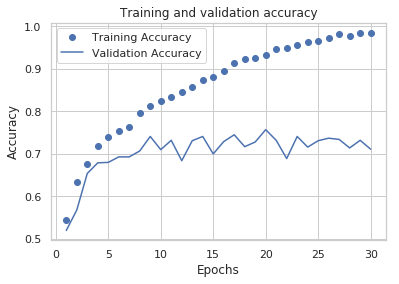

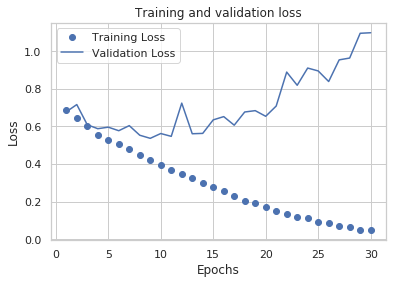

In [0]:
# Plot the loss and accuracy of the model over the training and validation data

# Looks overfit beyond belief to me! We have a History object that can tell us more 

history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




### Data augmentation

Above: textbook overfitting, which Chollet thinks is because I don't have many samples. We can fix this using data augmentation, transforming the input images with random transformations (e.g. rotation, reflection, translation) that should still result in obvious cats/dogs. 

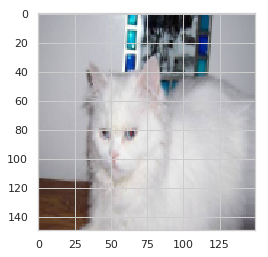

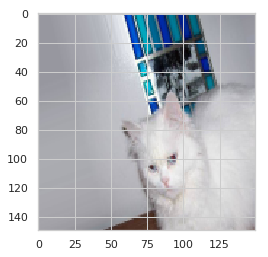

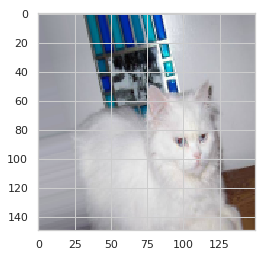

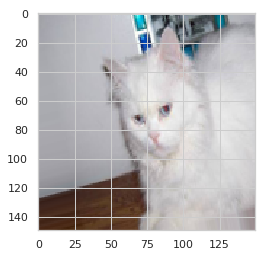

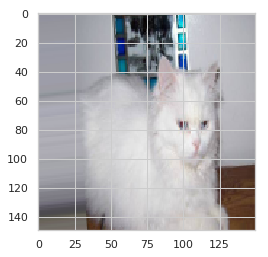

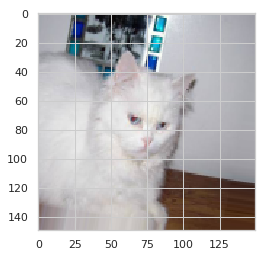

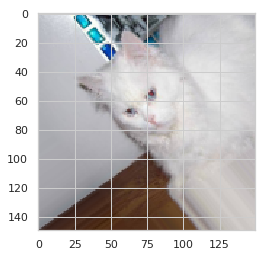

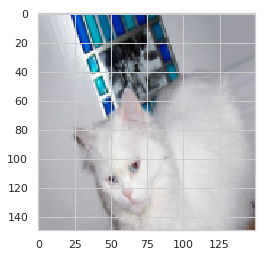

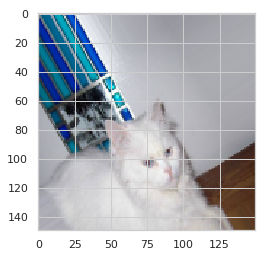

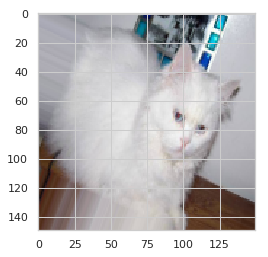

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
                                                         width_shift_range=0.2,
                                                         height_shift_range=0.2,
                                                         shear_range=0.2,
                                                         zoom_range=0.2,
                                                         horizontal_flip=True,
                                                         fill_mode="nearest"
                                                        )
# rescale=1./255 not used here

# Let's look at these images

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
# Read and resize the image
img  = keras.preprocessing.image.load_img(img_path, target_size=(150,150))
# Convert to a Numpy array with shape (150,150,3)
x = keras.preprocessing.image.img_to_array(img)
# Reshape to (1,150,150,3)
x = x.reshape((1,) + x.shape)

# Generate batches of randomly transformed images. Loops indefinitely, unless broken!
i = 0
for batch in datagen.flow(x, batch_size=1):
  imgplot = plt.imshow(keras.preprocessing.image.array_to_img(batch[0]))
  plt.show()
  i += 1
  if i == 10:
    break


Now the network will  never see the same image twice.  But the inputs are still highly correlated, so to further fight overfitting we'll add a `Dropout` layer.

In [24]:
# Now lets build a convnet with ConvNet2D and MaxPooling layers
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

W0617 16:50:38.198597 140289636902784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             rotation_range=40,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True
                                                            )
# Note we don't augment the validation data!
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 150x150 grids, with binary labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode="binary")

history = model.fit_generator(train_generator,
                              steps_per_epoch=100, # 100 batches of 20 samples = 2000 images
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 268ms/step - loss: 0.6931 - acc: 0.5259 - val_loss: 0.6792 - val_acc: 0.5945
Epoch 2/100
100/100 [==============================] - 23s 234ms/step - loss: 0.6790 - acc: 0.5588 - val_loss: 0.6630 - val_acc: 0.5664
Epoch 3/100
100/100 [==============================] - 24s 237ms/step - loss: 0.6680 - acc: 0.5825 - val_loss: 0.6352 - val_acc: 0.6364
Epoch 4/100
100/100 [==============================] - 24s 236ms/step - loss: 0.6518 - acc: 0.6084 - val_loss: 0.6188 - val_acc: 0.6443
Epoch 5/100
100/100 [==============================] - 24s 235ms/step - loss: 0.6301 - acc: 0.6347 - val_loss: 0.5955 - val_acc: 0.6789
Epoch 6/100
100/100 [==============================] - 24s 236ms/step - loss: 0.6194 - acc: 0.6506 - val_loss: 0.5826 - val_acc: 0.6817
Epoch 7/100
100/100 [==============================] - 24s 237ms/step - loss: 0.6040 - acc: 0.6672 -

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_2.h5")

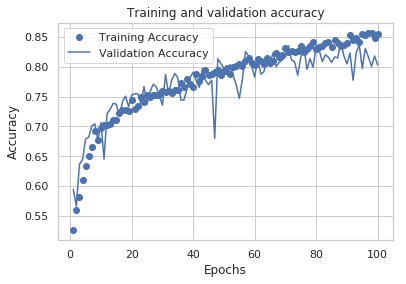

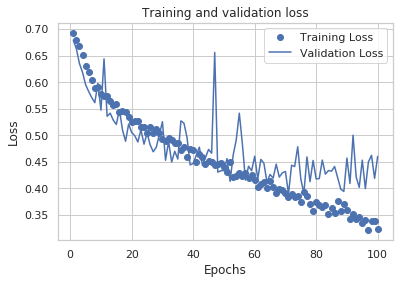

In [29]:
# Plot the loss and accuracy of the model over the training and validation data
history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




## Using pretrained convnets

### Feature extraction

Here we take a large convnet trained on the ImageNet dataset (here the VGG16 architecture) and applying it to our dataset. We can use the representations learned in that network to extract interesting features from new samples, and then run those features through a new classifier, trained from scratch.

In [7]:
# Include_top refers to the dense classifier on top of the convolutional base, which we omit here.
conv_base = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(150,150,3))

W0617 15:16:36.180573 140289636902784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 15:16:36.192692 140289636902784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 15:16:36.233597 140289636902784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 1s 0us/step


W0617 15:16:37.756829 140289636902784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0617 15:16:37.759613 140289636902784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [8]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

There are two options at this point:

1.   Run the convolutional base over the dataset, record its output as a Numpy array on disk, then train a standalone dense classifier on those arrays. This is fast and cheap, but e.g. stops us using data augmentation
2.   Stick a Dense layer on top of our model, the run the whole thing end to end.

In [11]:
# Fast feature extraction without data augmentation


# Create the test_train directory structure


base_dir = "/tmp/cats_and_dogs_small"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          class_mode="binary")
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size: (i+1)*batch_size] = features_batch
    labels[i*batch_size: (i+1)*batch_size] = labels_batch
    print(i)
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels



train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Found 1000 images belonging to 2 classes.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Found 1000 images belonging to 2 classes.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [0]:
# The extracted features are of shape (samples, 4,4,512), so we need to flatten them:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [15]:
# Run the Dense classifier
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation="relu", input_dim=4*4*512))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),
              loss="binary_crossentropy",
              metrics=["acc"]
             )

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

W0617 09:36:02.603422 140544694261632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0617 09:36:02.645134 140544694261632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 09:36:02.657738 140544694261632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6374 - acc: 0.6380 - val_loss: 0.4357 - val_acc: 0.8490
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4284 - acc: 0.8030 - val_loss: 0.3537 - val_acc: 0.8700
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3658 - acc: 0.8420 - val_loss: 0.3186 - val_acc: 0.8740
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3208 - acc: 0.8680 - val_loss: 0.2967 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2793 - acc: 0.8850 - val_loss: 0.2785 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2630 - acc: 0.8990 - val_loss: 0.2727 - val_acc: 0.8880
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2465 - acc: 0.9010 - val_loss: 0.2708 - val_acc: 0.8870
Epoch 8/30
200

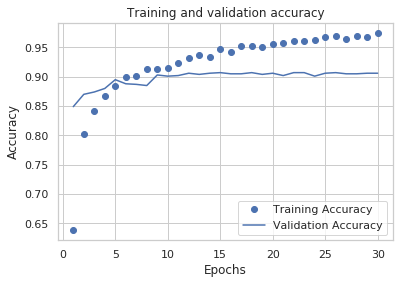

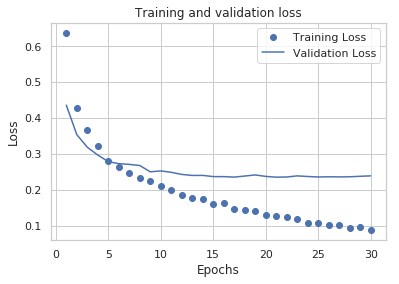

In [16]:
# Plot the loss and accuracy of the model over the training and validation data
history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




The validation accuracy is now up to 90% - so we've already done better than we could have done  with our tiny convnet. But we're still overfitting! So let's do data augmentation.

In [9]:
# Feature extraction, with data augmentation
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Freeze the convolutional base, otherwise its weights will be destroyed by the random
# initialisation of the Dense layers on top during training.

print(f"There are {len(model.trainable_weights)} trainable weights before freezing the conv base.")
conv_base.trainable = False
# There are 4 weight tensors - two per Dense layer (weights and bias).
print(f"There are {len(model.trainable_weights)} trainable weights after freezing the conv base.")


There are 30 trainable weights before freezing the conv base.
There are 4 trainable weights after freezing the conv base.


In [11]:
# We need to have a fully-trained classifer first

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             rotation_range=40,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True,
                                                             fill_mode="nearest"
                                                            )
# Note we don't augment the validation data!
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 150x150 grids, with binary labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode="binary")

model.compile(loss="binary_crossentropy",
             optimizer=keras.optimizers.RMSprop(lr=2e-5),
             metrics=["acc"])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_pretrained.h5")

W0617 15:20:20.066718 140289636902784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 15:20:20.079069 140289636902784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 24s 235ms/step - loss: 0.5883 - acc: 0.6880 - val_loss: 0.4580 - val_acc: 0.8130
Epoch 2/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4763 - acc: 0.7965 - val_loss: 0.3723 - val_acc: 0.8510
Epoch 3/30
100/100 [==============================] - 17s 175ms/step - loss: 0.4325 - acc: 0.8080 - val_loss: 0.3274 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 17s 175ms/step - loss: 0.4053 - acc: 0.8275 - val_loss: 0.3059 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 17s 174ms/step - loss: 0.3781 - acc: 0.8305 - val_loss: 0.2980 - val_acc: 0.8770
Epoch 6/30
100/100 [==============================] - 17s 174ms/step - loss: 0.3658 - acc: 0.8410 - val_loss: 0.2826 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 17s 174ms/step - loss: 0.3565 - acc: 0.8430 - val_lo

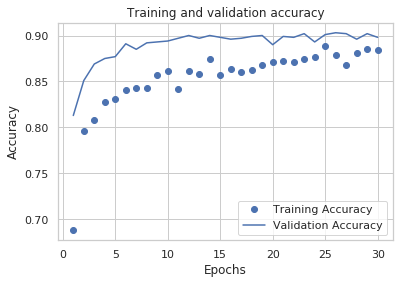

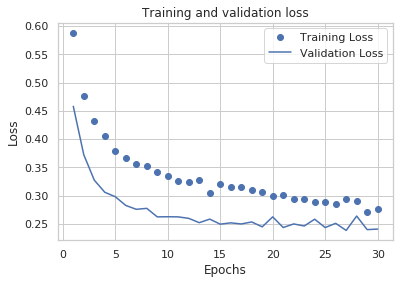

In [12]:
# Plot the loss and accuracy of the model over the training and validation data
def plotLossAndAccuracy(history):
  history_dict = history.history
  acc = history_dict["acc"]
  val_acc = history_dict["val_acc"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(loss) +1)

  plt.plot(epochs, acc, "bo", label="Training Accuracy")
  plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.plot(epochs, loss, "bo", label="Training Loss")
  plt.plot(epochs, val_loss, "b", label="Validation Loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

plotLossAndAccuracy(history)



Challot suggests that the above will get you to 96% accuracy, though it doesn't seem that way here!


### Fine tuning

Here we un-freeze a few of the top layers of the conv base (i.e. the last few before the dense classifier).

In [13]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
# We will fine-tune the last three convolutional layers
# i.e. all layers up to `block4_pool` will be frozen.
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [18]:
# Compile with a low learning rate, as we're fine-tuning here

model.compile(loss="binary_crossentropy",
             optimizer=keras.optimizers.RMSprop(lr=1e-5),
             metrics=["acc"]
             )
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_pretrained_finetuned.h5")

Epoch 1/100
100/100 [==============================] - 19s 195ms/step - loss: 0.2931 - acc: 0.8740 - val_loss: 0.2280 - val_acc: 0.9080
Epoch 2/100
100/100 [==============================] - 18s 179ms/step - loss: 0.2560 - acc: 0.8935 - val_loss: 0.2142 - val_acc: 0.9140
Epoch 3/100
100/100 [==============================] - 18s 177ms/step - loss: 0.2310 - acc: 0.9015 - val_loss: 0.2253 - val_acc: 0.9070
Epoch 4/100
100/100 [==============================] - 18s 176ms/step - loss: 0.2268 - acc: 0.9040 - val_loss: 0.2184 - val_acc: 0.9090
Epoch 5/100
100/100 [==============================] - 17s 175ms/step - loss: 0.2089 - acc: 0.9140 - val_loss: 0.1922 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 18s 177ms/step - loss: 0.1836 - acc: 0.9280 - val_loss: 0.1943 - val_acc: 0.9250
Epoch 7/100
100/100 [==============================] - 18s 175ms/step - loss: 0.1801 - acc: 0.9290 - val_loss: 0.1907 - val_acc: 0.9250
Epoch 8/100
100/100 [===========================

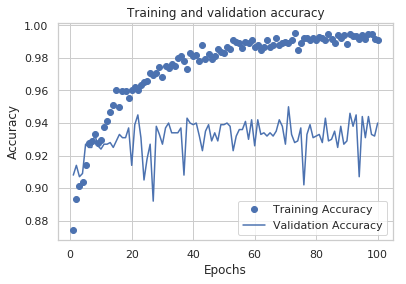

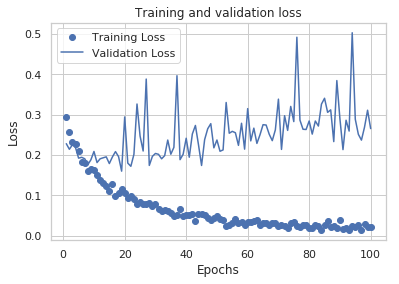

In [19]:
plotLossAndAccuracy(history)


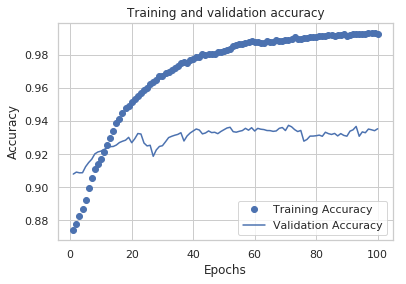

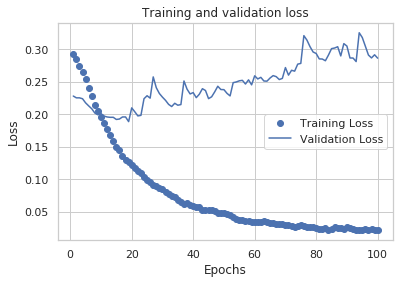

In [20]:
def plotSmoothedLossAndAccuracy(history):
  # Smooth by replacing each point with an exponential moving average
  def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
      if smoothed_points:
        previous = smoothed_points[-1]
        smoothed_points.append(previous*factor + point*(1-factor))
      else:
        smoothed_points.append(point)
    return smoothed_points

  history_dict = history.history
  acc = history_dict["acc"]
  val_acc = history_dict["val_acc"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(loss) +1)

  plt.plot(epochs, smooth_curve(acc), "bo", label="Training Accuracy")
  plt.plot(epochs, smooth_curve(val_acc), "b", label="Validation Accuracy")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.plot(epochs, smooth_curve(loss), "bo", label="Training Loss")
  plt.plot(epochs, smooth_curve(val_loss), "b", label="Validation Loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

plotSmoothedLossAndAccuracy(history)



In [21]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode="binary")

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


print(f"Test accuracy: {test_acc}")

Found 1000 images belonging to 2 classes.
Test accuracy: 0.9369999921321869


##  Visualising what convnets learn

We will look at three methods of visualising the representations learned .




### Visualising intermediate activations

Display the contents of every channel as a 2D image, for a given layer.

In [27]:
# Load the from-scratch model, with dropout and data augmentation
model = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_2.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [30]:
# Now choose a random image (not one that we trained on)

img_path ="/tmp/cats_and_dogs_small/test/cats/cat.1700.jpg"

img = keras.preprocessing.image.load_img(img_path, target_size=(150,150))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

print(img_tensor.shape)

(1, 150, 150, 3)


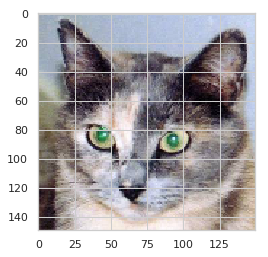

In [31]:
plt.imshow(img_tensor[0])
plt.show()

To extract the feature maps, we create a Keras model that takes batches of images as input, and outputs the activations of all convolution
and pooling layers.

In [35]:
# Get the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

# The activation of the first convolution layer for the cat image input
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


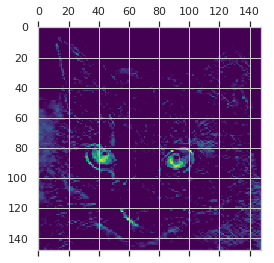

In [38]:
# It's a 148x148 feature map with 32 channels. What does e.g. the first channel look like?
plt.matshow(first_layer_activation[0,:,:,0], cmap="viridis")

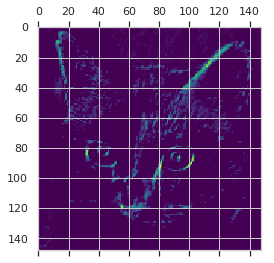

In [39]:
# And the second?
plt.matshow(first_layer_activation[0,:,:,1], cmap="viridis")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


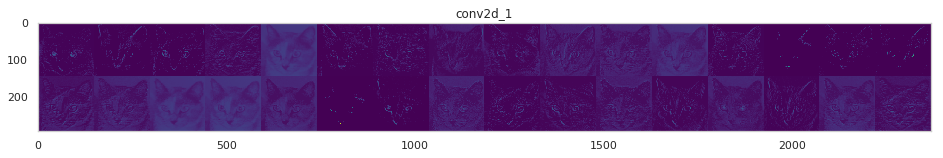

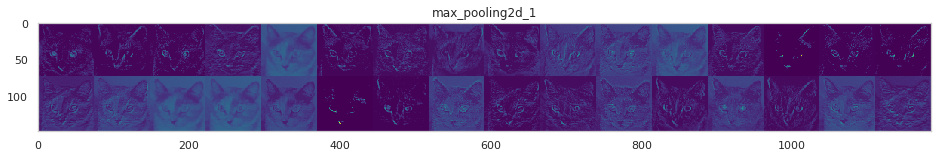

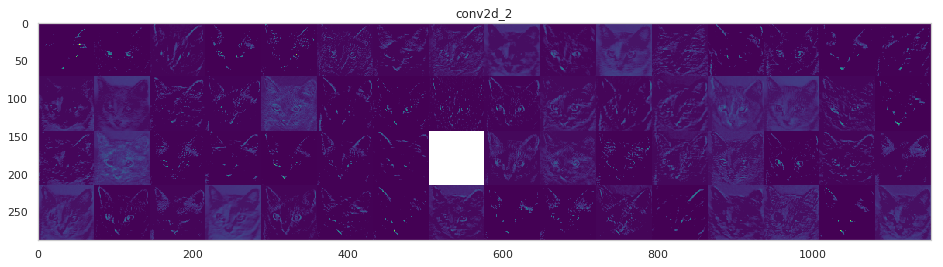

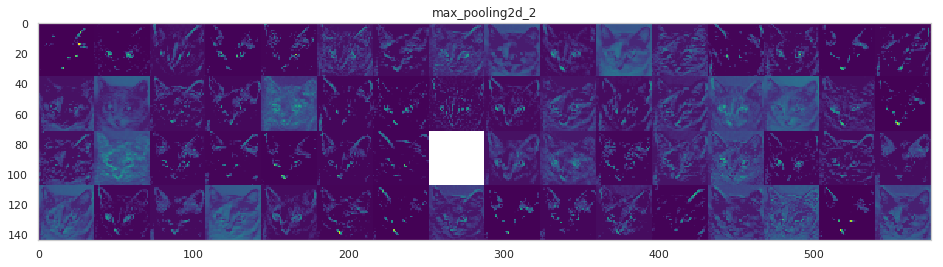

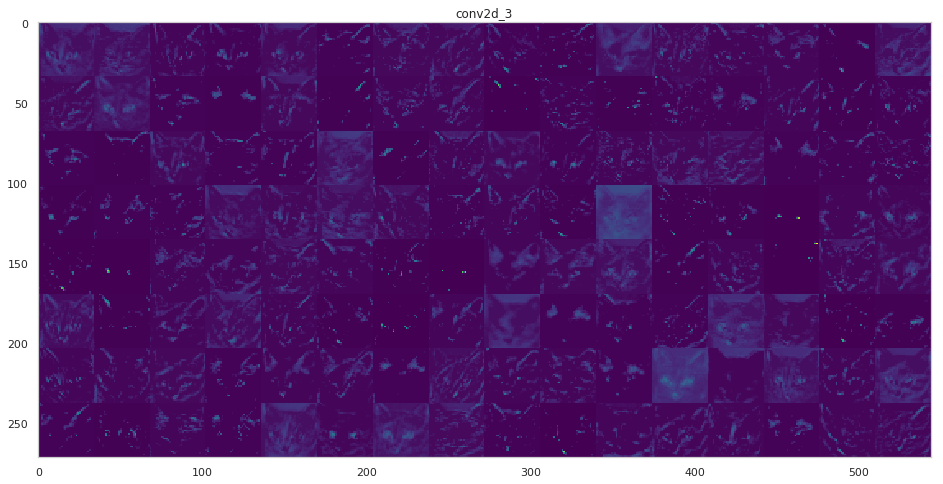

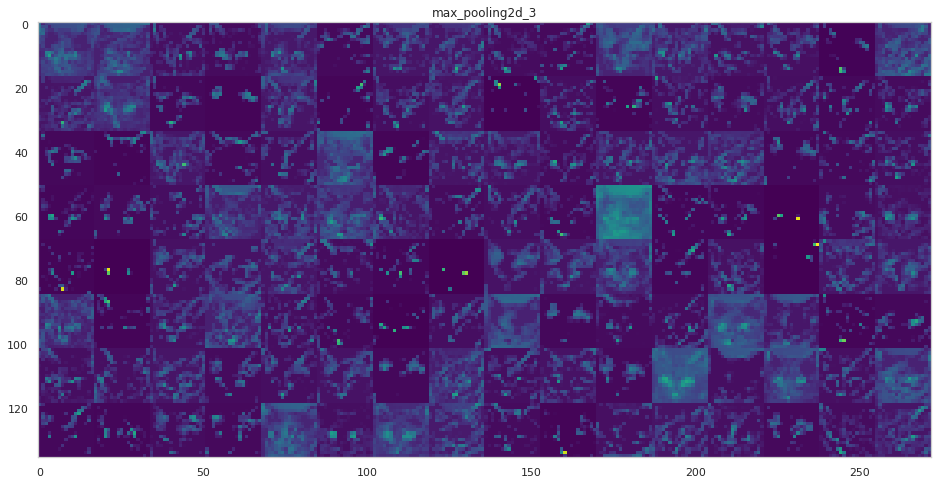

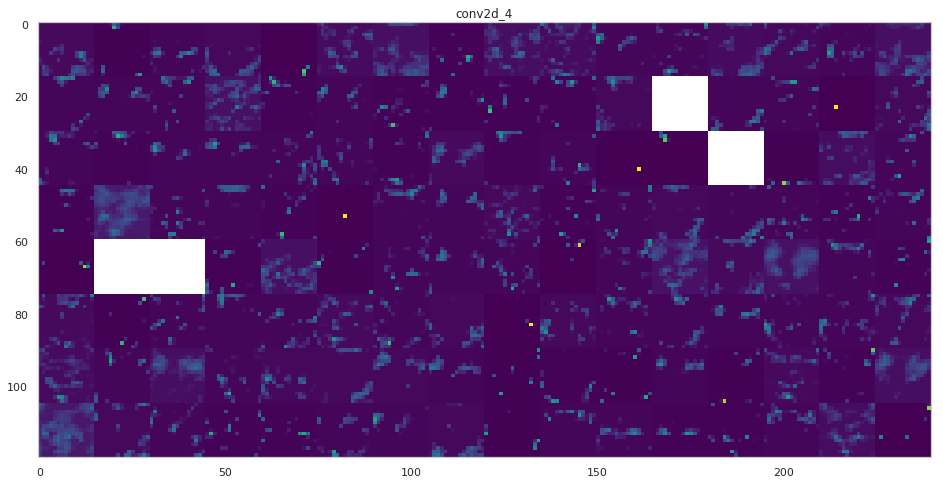

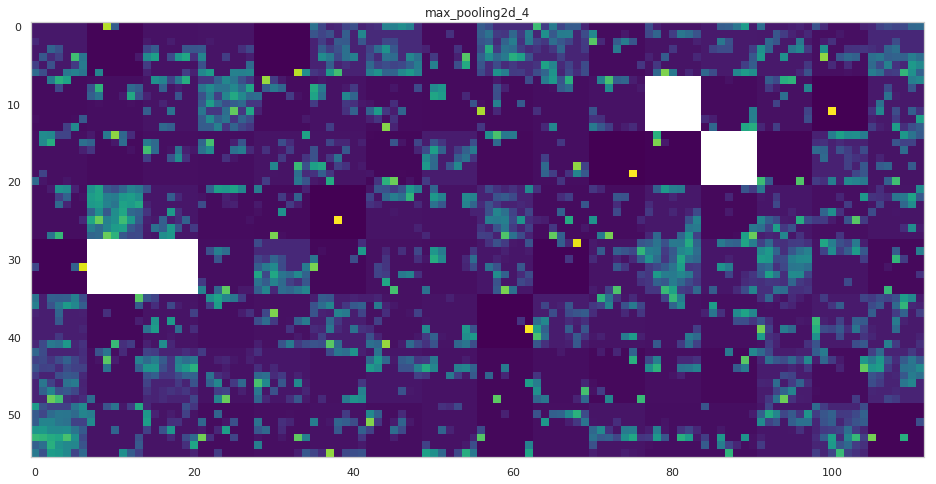

In [41]:
# Let's look at all the activations, for every channel in each activation map.

layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
  
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  # feature map has shape [l, size, size, n_features]
  _, size, _, n_features = layer_activation.shape
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size*n_cols, images_per_row*size))
  
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row+row]
      channel_image += channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channe_image = np.clip(channel_image, 0, 255).astype("uint8")
      display_grid[col*size:(col+1)*size, row*size: (row+1)*size] = channel_image
  
  scale = 1/size
  plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect="auto", cmap="viridis")
  
  

### Visualising convnet filters

Display the visual pattern that each filter is meant to respond to: we work this out with gradient ascent in input space.

In [0]:
# Post-process arrays back to 0-255 ints

def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  x += 0.5
  x = np.clip(x, 0, 1)
  x *= 255
  x = np.clip(x, 0, 255).astype("uint8")
  return x
  

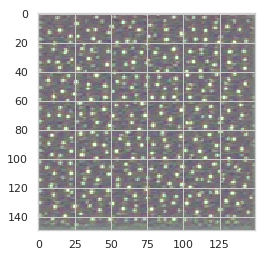

In [55]:

# The activation of filter 0 in the layer "block3_conv1" of the VGG16 network
model = keras.applications.VGG16(weights="imagenet", include_top=False)


def generate_pattern(model, layer_name, filter_index, size=150):
  """
  Builds a loss function that maximises the activation of the nth filter of the layer under
  consideration
  """
  layer_output = model.get_layer(layer_name).output
  loss = keras.backend.mean(layer_output[:,:,:, filter_index]) 

  # Obtain the gradient of the loss wrt the input (The call to gradients returns a list of tensors)
  grads = keras.backend.gradients(loss, model.input)[0]

  # Help the gradient-descent process to go smoothly by normalising the gradient by dividing it by
  # its L2 norm.
  grads /= (keras.backend.sqrt(keras.backend.mean(keras.backend.square(grads))) + 1e-5)
  # Add a 1e-5 to avoid division by 0

  # Define a Keras backend function to get the value of the loss tensor and the gradient tensor,
  # given an image.
  iterate = keras.backend.function([model.input], [loss,grads])

  # Now we can define a loop to do SGD:
  input_img_data = np.random.random((1,size,size,3))*20+128

  step = 1
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value*step
    
  img = input_img_data[0]
  return deprocess_image(img)


layer_name = "block3_conv1"
filter_index = 0

plt.imshow(generate_pattern(model, layer_name, filter_index))

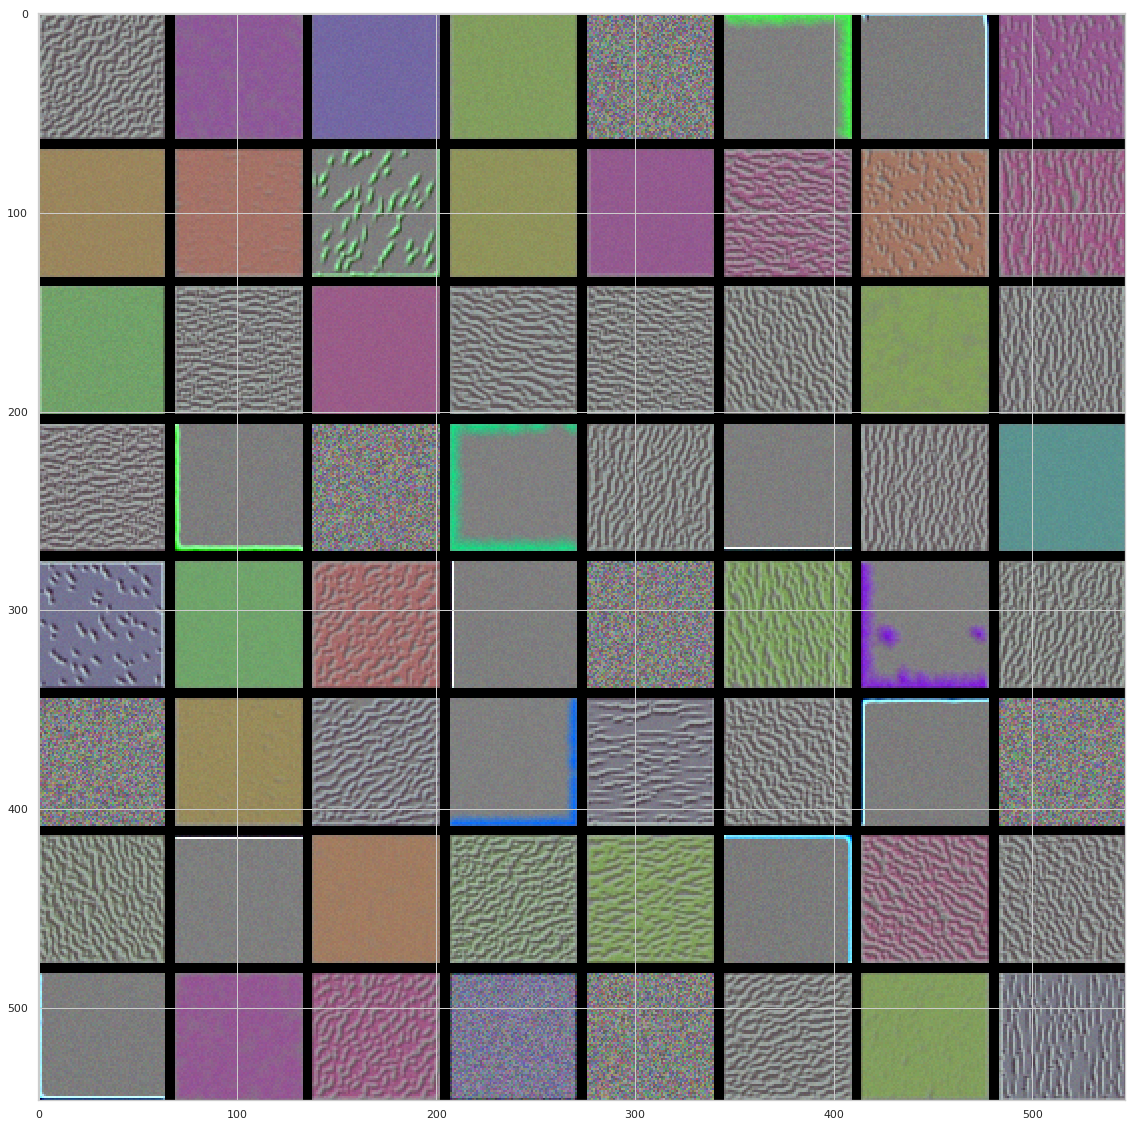

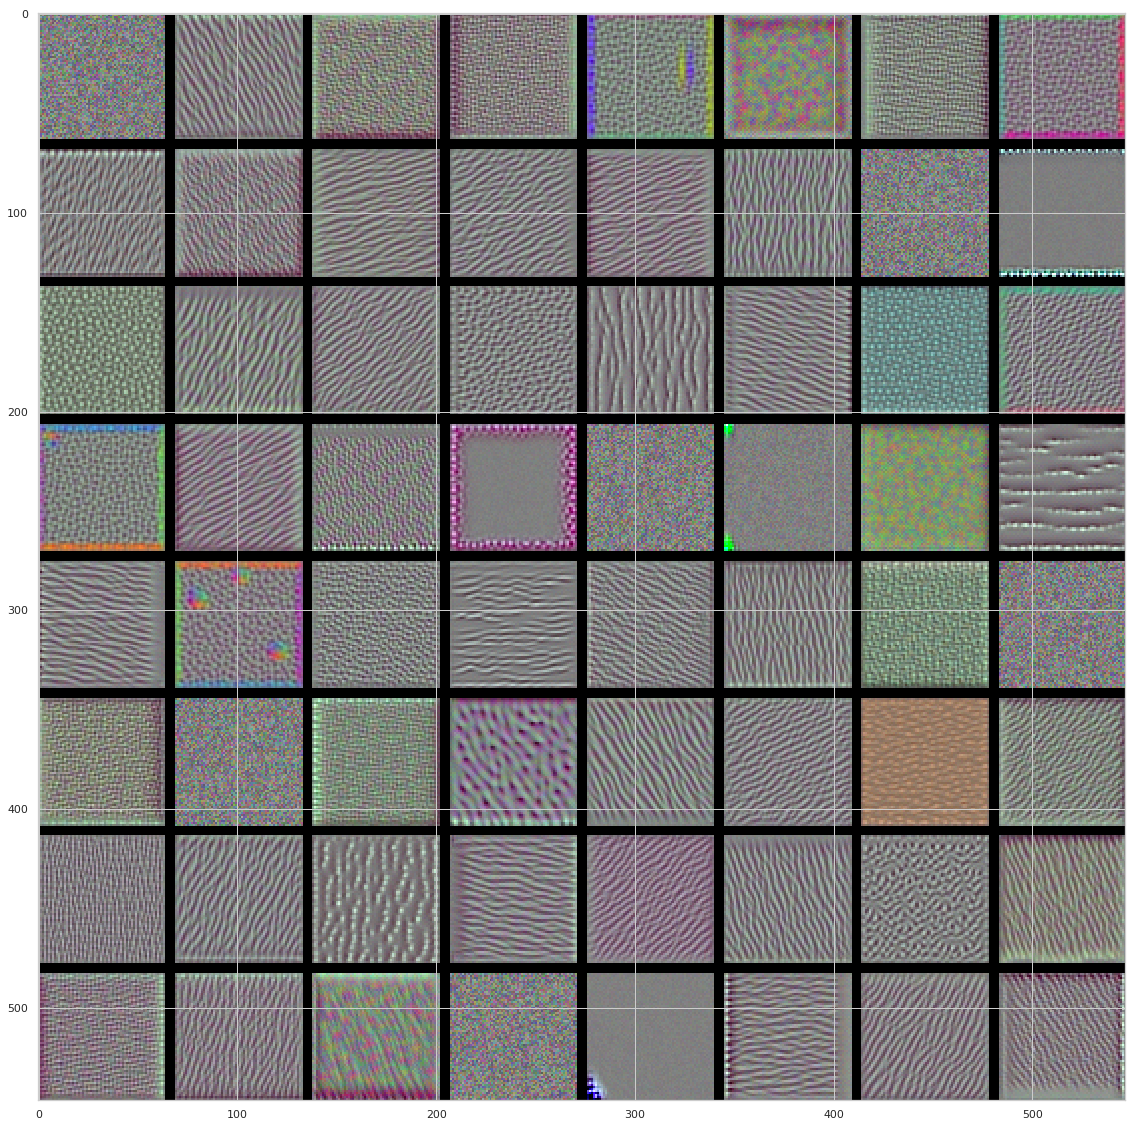

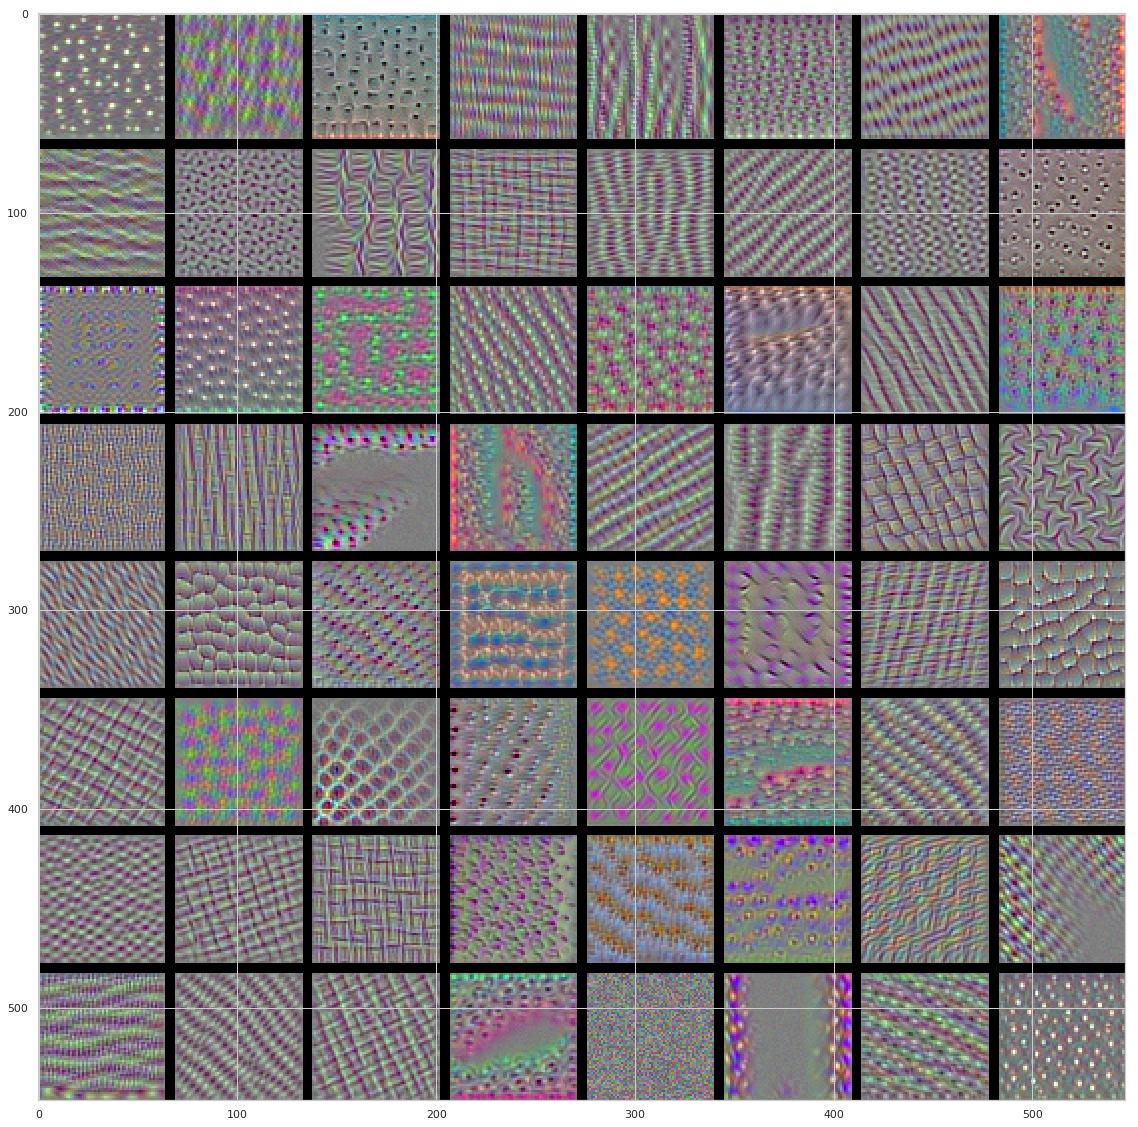

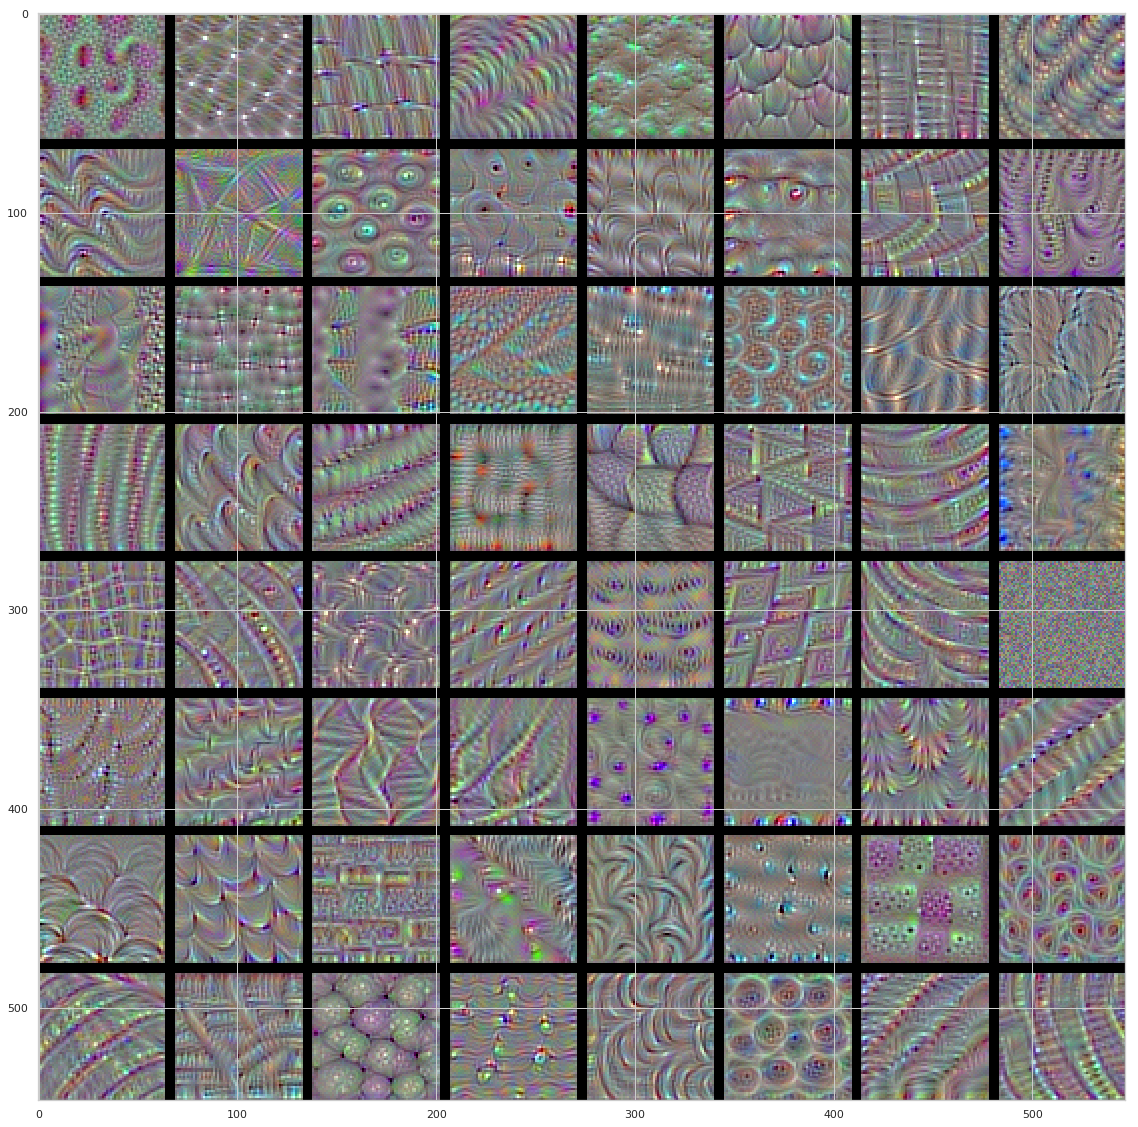

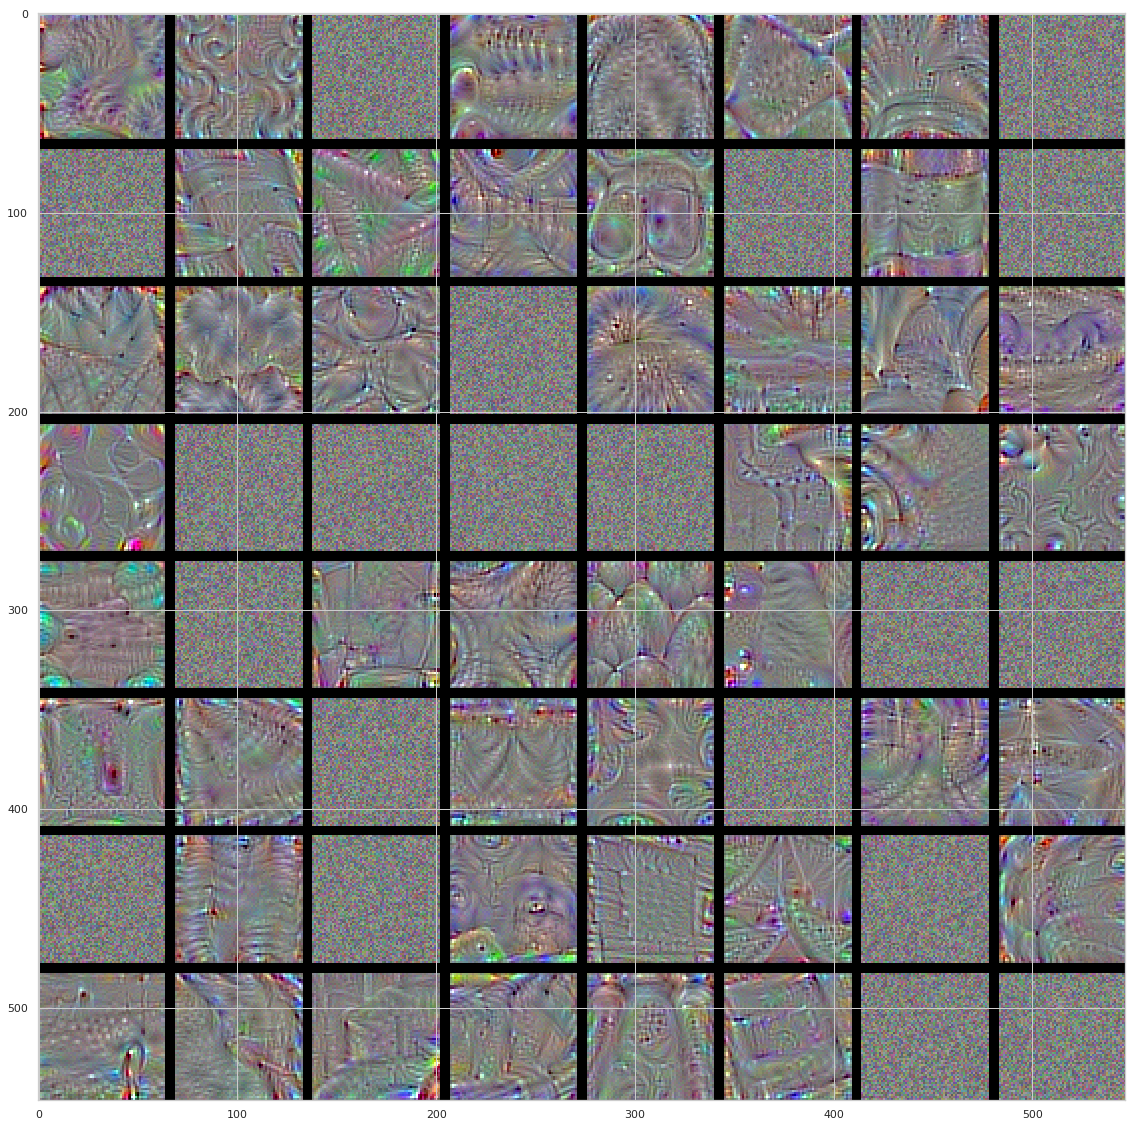

In [68]:
# Now viz the first 64 filters filter in  the first layer of each conv block
for i in range(1,6):
  layer_name = f"block{i}_conv1"
  size = 64
  margin = 5

  results = np.zeros((8*size + 7*margin, 8*size + 7*margin, 3), dtype="uint8")

  for i in range(8):
    for j in range(8):
      filter_img = generate_pattern(model, layer_name, i+(j*8), size=size)
      horizontal_start = i*size + i*margin
      horizontal_end = horizontal_start + size

      vertical_start = j*size + j*margin
      vertical_end = vertical_start + size

      results[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_img

  plt.figure(figsize=(20,20))
  plt.imshow(results)
  plt.show()

### Visualising heatmaps of class activation

Here we try to understand which parts of a given image contribute to its final classification - the general category of visualisation this belongs to is *class activation map* (CAM) viz. 

In [69]:
model = keras.applications.VGG16(weights="imagenet")

553467904/553467096 [==============================] - 9s 0us/step


In [0]:
img_path = "/content/drive/My Drive/Colab Notebooks/creative_commons_elephant.jpg"

img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

x = keras.preprocessing.image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = keras.applications.vgg16.preprocess_input(x)

In [71]:
# Predict what class (or classes) the image belongs to 
preds = model.predict(x)
print("Predicted:", keras.applications.vgg16.decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.90942144), ('n01871265', 'tusker', 0.08618243), ('n02504013', 'Indian_elephant', 0.0043545766)]


In [0]:
# Set up the Grad-CAM process to visualise which parts of the img are the most African-elephant like

ele_index = np.argmax(preds[0])
african_elephant_output = model.output[:, ele_index]

last_conv_layer = model.get_layer("block5_conv3")

# Gradient of the African Elephant calss  wrt the output feature map of the last conv layer
grads = keras.backend.gradients(african_elephant_output, last_conv_layer.output)[0]

# A vector of shape (512,) where each entry is the mean intensity of the gradient over a
# specific channel
pooled_grads = keras.backend.mean(grads, axis=(0,1,2))

iterate = keras.backend.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  # Multiplies each channel in the feature-map array by "how important this channel is" wrt the ele.
  conv_layer_output_value[:,:, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1) # channel-wise mean
  

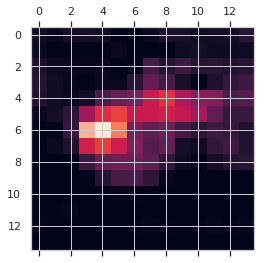

In [73]:
# post-process
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [81]:
# Use OpenCV to superimpose the heatmap on the original image

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap*0.4 + img

cv2.imwrite("/content/drive/My Drive/Colab Notebooks/elephant_cam.jpg", superimposed_img)



True

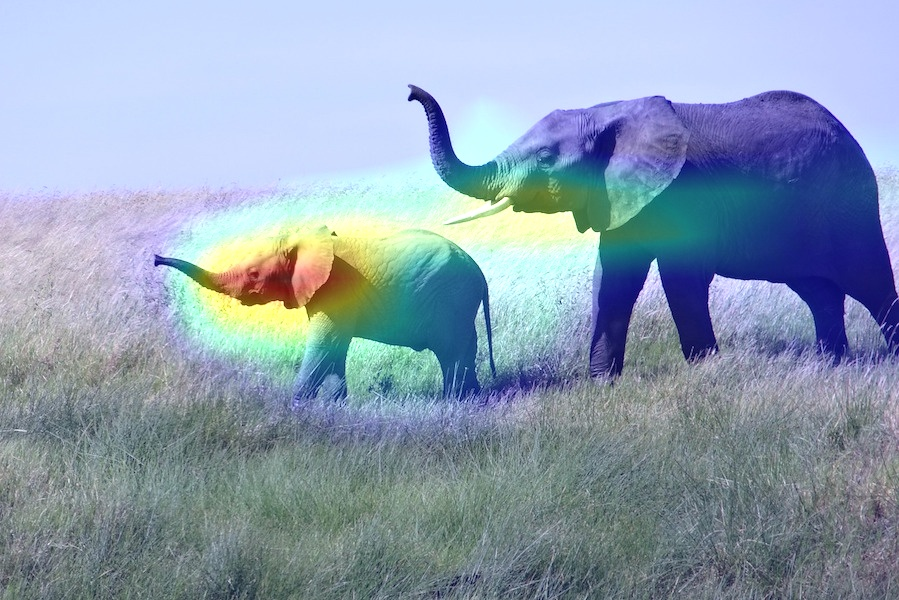

In [83]:
from IPython.display import Image

Image("/content/drive/My Drive/Colab Notebooks/elephant_cam.jpg")